<a href="https://colab.research.google.com/github/AbdullahAZaidi/Radar_AI_Classification/blob/master/Soli_data_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import h5py
import glob
import numpy as np

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
def data_collection():
    # dataset = np.ndarray(shape=(len(label), 32, 32, 3), dtype=np.float32)
    data = []
    label = []
    fig=plt.figure(figsize=(8, 8))
    for name in glob.glob('/content/gdrive/My Drive/Soli_data/dsp_3/*.h5'):
        use_channel = 0
        with h5py.File(name, 'r') as f:
    # Data and label are numpy arrays
            data_s = f['ch{}'.format(use_channel)][()]
            label_s = f['label'][()]
#             print(len(data_s))
            for i in range (int(len(data_s))):
                image = data_s[i].reshape(32,32,1)
#                 fig.add_subplot(20,20,i+1)
                # plt.imshow(image)
#                 plt.show()
                data.append(image)
                label.append(label_s[i])
#                 print (label_s[i])
                
    return data, label


In [35]:
from sklearn.model_selection import train_test_split

data, labels = data_collection()
# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.33, shuffle= True)

x_train = np.array(x_train)
x_valid = np.array(x_valid)

y_train = np.array(y_train)
y_valid = np.array(y_valid)


<Figure size 576x576 with 0 Axes>

In [40]:
print(np.unique(y_valid))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [51]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.utils import np_utils

import cv2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [25]:
#VGG16

# model = Sequential()
# model.add(Conv2D(input_shape=(32,32,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


# model.add(Flatten())
# model.add(Dense(units=1024,activation="relu"))
# model.add(Dense(units=1024,activation="relu"))
# model.add(Dense(units=5, activation="softmax"))

In [52]:
#Deifning LeNET

model = Sequential()
model.add(Conv2D(input_shape=(32,32,1),filters=6,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(AveragePooling2D())
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(AveragePooling2D())
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))



model.add(Flatten())
model.add(Dense(units=120,activation="relu"))
model.add(Dense(units=84,activation="relu"))
model.add(Dense(units=12, activation="softmax"))


# model.add(layers.AveragePooling2D())


In [53]:
# optimization

from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [54]:
# running the model 

history = model.fit(
    x_train,
    y_train,
    batch_size=None,
    steps_per_epoch=100,
    validation_steps=10,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_valid, y_valid),
)

Train on 3962 samples, validate on 1952 samples
Epoch 1/10
100/100 [==============================] - 4s 42ms/step - loss: 1.9389 - accuracy: 0.3469 - val_loss: 0.1468 - val_accuracy: 5.0102
Epoch 2/10
100/100 [==============================] - 4s 40ms/step - loss: 1.3469 - accuracy: 0.5405 - val_loss: 0.1265 - val_accuracy: 5.6352
Epoch 3/10
100/100 [==============================] - 4s 40ms/step - loss: 1.1591 - accuracy: 0.6031 - val_loss: 0.1162 - val_accuracy: 6.0092
Epoch 4/10
100/100 [==============================] - 4s 40ms/step - loss: 1.0667 - accuracy: 0.6327 - val_loss: 0.1110 - val_accuracy: 6.2295
Epoch 5/10
100/100 [==============================] - 4s 40ms/step - loss: 1.0044 - accuracy: 0.6544 - val_loss: 0.1083 - val_accuracy: 6.3986
Epoch 6/10
100/100 [==============================] - 4s 40ms/step - loss: 0.9521 - accuracy: 0.6736 - val_loss: 0.1058 - val_accuracy: 6.5471
Epoch 7/10
100/100 [==============================] - 4s 40ms/step - loss: 0.9071 - accuracy: 

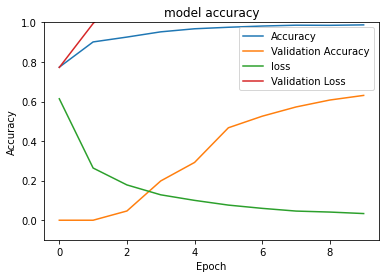

In [10]:
# plotting network performance

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim(top = 1)
plt.show()

[2]
[[5.9586875e-02 1.7503069e-01 7.1461266e-01 3.1994127e-03 3.2244765e-04
  1.3410264e-11 2.1822125e-02 3.5705469e-07 2.1046303e-02 2.8357771e-03
  1.5433241e-03 0.0000000e+00]]


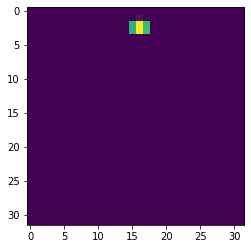

In [55]:
# Testing the network on a random image

j = 22
img = x_valid[j]
print (y_valid[j])
img_2 = np.squeeze(img, axis = 2)
plt.imshow(img_2)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)